In [1]:
from rdkit import Chem
from syba.syba import SybaClassifier
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
syba = SybaClassifier()
syba.fitDefaultScore()

### Kinase Inhibitors used to predict new structures selection

In [3]:
initial_smi = pd.read_excel('ROR_gamma_active_QED_Lipinski.xlsx')

In [4]:
initial_smi

,Unnamed: 0,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED
0,0,O=S(=O)(c1ccccc1)N(CC(F)(F)F)c1ccc(C(O)(C(F)(F...,481.039418,4.75640,1,3,5,57.61,2,1,1,0.627349
1,1,CC(=O)Nc1nc(C)c(S(=O)(=O)Nc2ccc(C(O)(C(F)(F)F)...,477.025167,3.52292,3,6,5,108.39,2,1,1,0.571467
2,2,CC(=O)N1CCN(Cc2ccc(-c3ccc(C(O)(C(F)(F)F)C(F)(F...,460.158547,4.32990,1,3,4,43.78,2,1,1,0.691332
3,3,CC(=O)Nc1ccc2c(c1)CCCN2Cc1ccc(C(O)(C(F)(F)F)C(...,446.142897,4.91000,2,3,4,52.57,2,1,1,0.656690
4,4,O=S(=O)(Nc1ccc2c(c1)N(S(=O)(=O)c1ccc(F)cc1)CCC...,482.058184,4.04620,1,4,5,83.55,3,0,1,0.594979
5,5,O=C(O)C1CCC(c2nn(C(=O)c3c(Cl)cccc3C(F)(F)F)c3c...,482.065648,4.77500,2,5,3,92.42,3,1,1,0.524369
6,6,Cc1cccc(C(=O)Nc2cc(-c3ccccc3)no2)c1,278.105528,3.90232,1,3,3,55.13,3,0,1,0.790067
7,7,Cc1cc(C)c2nc(C(=O)Nc3sccc3C)sc2c1,302.054755,4.53536,1,4,2,41.99,3,0,1,0.755082
8,8,CCC(=O)Nc1ccc2nn(-c3ccc(CC)cc3)nc2c1,294.148061,3.33140,1,4,4,59.81,3,0,1,0.802573


In [5]:
mols = [Chem.MolFromSmiles(smi) for smi in list(initial_smi['SMILES'])]

In [6]:
SYBA_scores = [syba.predict(mol=mol) for mol in mols] 

In [7]:
len(SYBA_scores)

9

In [8]:
data_f = pd.DataFrame(initial_smi)

In [9]:
data_f.head()

,Unnamed: 0,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED
0,0,O=S(=O)(c1ccccc1)N(CC(F)(F)F)c1ccc(C(O)(C(F)(F...,481.039418,4.75640,1,3,5,57.61,2,1,1,0.627349
1,1,CC(=O)Nc1nc(C)c(S(=O)(=O)Nc2ccc(C(O)(C(F)(F)F)...,477.025167,3.52292,3,6,5,108.39,2,1,1,0.571467
2,2,CC(=O)N1CCN(Cc2ccc(-c3ccc(C(O)(C(F)(F)F)C(F)(F...,460.158547,4.32990,1,3,4,43.78,2,1,1,0.691332
3,3,CC(=O)Nc1ccc2c(c1)CCCN2Cc1ccc(C(O)(C(F)(F)F)C(...,446.142897,4.91000,2,3,4,52.57,2,1,1,0.656690
4,4,O=S(=O)(Nc1ccc2c(c1)N(S(=O)(=O)c1ccc(F)cc1)CCC...,482.058184,4.04620,1,4,5,83.55,3,0,1,0.594979


In [10]:
data_f['SYBA_score'] = SYBA_scores

In [11]:
data_f.head()

,Unnamed: 0,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED,SYBA_score
0,0,O=S(=O)(c1ccccc1)N(CC(F)(F)F)c1ccc(C(O)(C(F)(F...,481.039418,4.75640,1,3,5,57.61,2,1,1,0.627349,91.567730
1,1,CC(=O)Nc1nc(C)c(S(=O)(=O)Nc2ccc(C(O)(C(F)(F)F)...,477.025167,3.52292,3,6,5,108.39,2,1,1,0.571467,89.102471
2,2,CC(=O)N1CCN(Cc2ccc(-c3ccc(C(O)(C(F)(F)F)C(F)(F...,460.158547,4.32990,1,3,4,43.78,2,1,1,0.691332,119.775813
3,3,CC(=O)Nc1ccc2c(c1)CCCN2Cc1ccc(C(O)(C(F)(F)F)C(...,446.142897,4.91000,2,3,4,52.57,2,1,1,0.656690,116.609837
4,4,O=S(=O)(Nc1ccc2c(c1)N(S(=O)(=O)c1ccc(F)cc1)CCC...,482.058184,4.04620,1,4,5,83.55,3,0,1,0.594979,197.343785


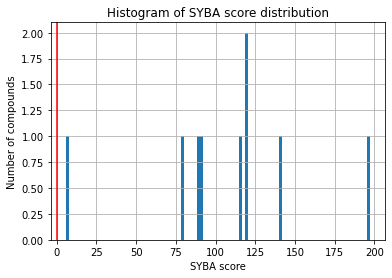

count      9.000000
mean     106.655244
std       51.546881
min        5.717677
25%       89.102471
50%      116.609837
75%      119.775813
max      197.343785
Name: SYBA_score, dtype: float64
Kurtosis:
2.0112
Skewness:
-0.3127


In [12]:
plt.hist(data_f['SYBA_score'],bins=100)
plt.xlabel('SYBA score')
plt.ylabel('Number of compounds')
plt.title('Histogram of SYBA score distribution')
plt.axvline(x=0.0, color='r')
plt.grid(True)
plt.show()

print(data_f['SYBA_score'].describe())
print('Kurtosis:')
print(round(data_f['SYBA_score'].kurtosis(),4))
print('Skewness:')
print(round(data_f['SYBA_score'].skew(),4))

In [13]:
initial_SMILES_to_get_new_molecules = data_f[data_f['SYBA_score'] > 0]

In [14]:
len(initial_SMILES_to_get_new_molecules)

9

In [15]:
initial_SMILES_to_get_new_molecules = initial_SMILES_to_get_new_molecules.reset_index()

In [16]:
initial_SMILES_to_get_new_molecules

,index,Unnamed: 0,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED,SYBA_score
0,0,0,O=S(=O)(c1ccccc1)N(CC(F)(F)F)c1ccc(C(O)(C(F)(F...,481.039418,4.75640,1,3,5,57.61,2,1,1,0.627349,91.567730
1,1,1,CC(=O)Nc1nc(C)c(S(=O)(=O)Nc2ccc(C(O)(C(F)(F)F)...,477.025167,3.52292,3,6,5,108.39,2,1,1,0.571467,89.102471
2,2,2,CC(=O)N1CCN(Cc2ccc(-c3ccc(C(O)(C(F)(F)F)C(F)(F...,460.158547,4.32990,1,3,4,43.78,2,1,1,0.691332,119.775813
3,3,3,CC(=O)Nc1ccc2c(c1)CCCN2Cc1ccc(C(O)(C(F)(F)F)C(...,446.142897,4.91000,2,3,4,52.57,2,1,1,0.656690,116.609837
4,4,4,O=S(=O)(Nc1ccc2c(c1)N(S(=O)(=O)c1ccc(F)cc1)CCC...,482.058184,4.04620,1,4,5,83.55,3,0,1,0.594979,197.343785
5,5,5,O=C(O)C1CCC(c2nn(C(=O)c3c(Cl)cccc3C(F)(F)F)c3c...,482.065648,4.77500,2,5,3,92.42,3,1,1,0.524369,5.717677
6,6,6,Cc1cccc(C(=O)Nc2cc(-c3ccccc3)no2)c1,278.105528,3.90232,1,3,3,55.13,3,0,1,0.790067,119.444502
7,7,7,Cc1cc(C)c2nc(C(=O)Nc3sccc3C)sc2c1,302.054755,4.53536,1,4,2,41.99,3,0,1,0.755082,79.765161
8,8,8,CCC(=O)Nc1ccc2nn(-c3ccc(CC)cc3)nc2c1,294.148061,3.33140,1,4,4,59.81,3,0,1,0.802573,140.570223


In [17]:
del initial_SMILES_to_get_new_molecules['Unnamed: 0']
del initial_SMILES_to_get_new_molecules['index']

In [18]:
initial_SMILES_to_get_new_molecules

,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED,SYBA_score
0,O=S(=O)(c1ccccc1)N(CC(F)(F)F)c1ccc(C(O)(C(F)(F...,481.039418,4.75640,1,3,5,57.61,2,1,1,0.627349,91.567730
1,CC(=O)Nc1nc(C)c(S(=O)(=O)Nc2ccc(C(O)(C(F)(F)F)...,477.025167,3.52292,3,6,5,108.39,2,1,1,0.571467,89.102471
2,CC(=O)N1CCN(Cc2ccc(-c3ccc(C(O)(C(F)(F)F)C(F)(F...,460.158547,4.32990,1,3,4,43.78,2,1,1,0.691332,119.775813
3,CC(=O)Nc1ccc2c(c1)CCCN2Cc1ccc(C(O)(C(F)(F)F)C(...,446.142897,4.91000,2,3,4,52.57,2,1,1,0.656690,116.609837
4,O=S(=O)(Nc1ccc2c(c1)N(S(=O)(=O)c1ccc(F)cc1)CCC...,482.058184,4.04620,1,4,5,83.55,3,0,1,0.594979,197.343785
5,O=C(O)C1CCC(c2nn(C(=O)c3c(Cl)cccc3C(F)(F)F)c3c...,482.065648,4.77500,2,5,3,92.42,3,1,1,0.524369,5.717677
6,Cc1cccc(C(=O)Nc2cc(-c3ccccc3)no2)c1,278.105528,3.90232,1,3,3,55.13,3,0,1,0.790067,119.444502
7,Cc1cc(C)c2nc(C(=O)Nc3sccc3C)sc2c1,302.054755,4.53536,1,4,2,41.99,3,0,1,0.755082,79.765161
8,CCC(=O)Nc1ccc2nn(-c3ccc(CC)cc3)nc2c1,294.148061,3.33140,1,4,4,59.81,3,0,1,0.802573,140.570223


In [19]:
initial_SMILES_to_get_new_molecules_without_duplicates = initial_SMILES_to_get_new_molecules['SMILES'].drop_duplicates()

In [20]:
len(initial_SMILES_to_get_new_molecules_without_duplicates)

9

In [21]:
a = len(initial_SMILES_to_get_new_molecules_without_duplicates)
b = len(SYBA_scores)

In [22]:
print("Percentage of molecules that passes SYBA score threshold: "+str(round(a*100/b,2))+' %.')

Percentage of molecules that passes SYBA score threshold: 100.0 %.


### Choose 5 structures to make predictions - 2 with highest average QED and SYBA score, 2 with medium average QED and SYBA score and 1 from the end

In [23]:
initial_SMILES_to_get_new_molecules['SMILES_length'] = [len(initial_SMILES_to_get_new_molecules['SMILES'][smi]) for smi in range(len(initial_SMILES_to_get_new_molecules['SMILES']))]

In [24]:
initial_SMILES_to_get_new_molecules.head()

,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED,SYBA_score,SMILES_length
0,O=S(=O)(c1ccccc1)N(CC(F)(F)F)c1ccc(C(O)(C(F)(F...,481.039418,4.75640,1,3,5,57.61,2,1,1,0.627349,91.567730,61
1,CC(=O)Nc1nc(C)c(S(=O)(=O)Nc2ccc(C(O)(C(F)(F)F)...,477.025167,3.52292,3,6,5,108.39,2,1,1,0.571467,89.102471,61
2,CC(=O)N1CCN(Cc2ccc(-c3ccc(C(O)(C(F)(F)F)C(F)(F...,460.158547,4.32990,1,3,4,43.78,2,1,1,0.691332,119.775813,60
3,CC(=O)Nc1ccc2c(c1)CCCN2Cc1ccc(C(O)(C(F)(F)F)C(...,446.142897,4.91000,2,3,4,52.57,2,1,1,0.656690,116.609837,56
4,O=S(=O)(Nc1ccc2c(c1)N(S(=O)(=O)c1ccc(F)cc1)CCC...,482.058184,4.04620,1,4,5,83.55,3,0,1,0.594979,197.343785,60


In [25]:
initial_SMILES_to_get_new_molecules['QED normalized'] =(initial_SMILES_to_get_new_molecules['QED']-initial_SMILES_to_get_new_molecules['QED'].min())/(initial_SMILES_to_get_new_molecules['QED'].max()-initial_SMILES_to_get_new_molecules['QED'].min())

In [26]:
initial_SMILES_to_get_new_molecules.head()

,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED,SYBA_score,SMILES_length,QED normalized
0,O=S(=O)(c1ccccc1)N(CC(F)(F)F)c1ccc(C(O)(C(F)(F...,481.039418,4.75640,1,3,5,57.61,2,1,1,0.627349,91.567730,61,0.370160
1,CC(=O)Nc1nc(C)c(S(=O)(=O)Nc2ccc(C(O)(C(F)(F)F)...,477.025167,3.52292,3,6,5,108.39,2,1,1,0.571467,89.102471,61,0.169291
2,CC(=O)N1CCN(Cc2ccc(-c3ccc(C(O)(C(F)(F)F)C(F)(F...,460.158547,4.32990,1,3,4,43.78,2,1,1,0.691332,119.775813,60,0.600144
3,CC(=O)Nc1ccc2c(c1)CCCN2Cc1ccc(C(O)(C(F)(F)F)C(...,446.142897,4.91000,2,3,4,52.57,2,1,1,0.656690,116.609837,56,0.475623
4,O=S(=O)(Nc1ccc2c(c1)N(S(=O)(=O)c1ccc(F)cc1)CCC...,482.058184,4.04620,1,4,5,83.55,3,0,1,0.594979,197.343785,60,0.253804


In [27]:
initial_SMILES_to_get_new_molecules['SYBA_score normalized'] =(initial_SMILES_to_get_new_molecules['SYBA_score']-initial_SMILES_to_get_new_molecules['SYBA_score'].min())/(initial_SMILES_to_get_new_molecules['SYBA_score'].max()-initial_SMILES_to_get_new_molecules['SYBA_score'].min())

In [28]:
initial_SMILES_to_get_new_molecules.head()

,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED,SYBA_score,SMILES_length,QED normalized,SYBA_score normalized
0,O=S(=O)(c1ccccc1)N(CC(F)(F)F)c1ccc(C(O)(C(F)(F...,481.039418,4.75640,1,3,5,57.61,2,1,1,0.627349,91.567730,61,0.370160,0.448008
1,CC(=O)Nc1nc(C)c(S(=O)(=O)Nc2ccc(C(O)(C(F)(F)F)...,477.025167,3.52292,3,6,5,108.39,2,1,1,0.571467,89.102471,61,0.169291,0.435143
2,CC(=O)N1CCN(Cc2ccc(-c3ccc(C(O)(C(F)(F)F)C(F)(F...,460.158547,4.32990,1,3,4,43.78,2,1,1,0.691332,119.775813,60,0.600144,0.595212
3,CC(=O)Nc1ccc2c(c1)CCCN2Cc1ccc(C(O)(C(F)(F)F)C(...,446.142897,4.91000,2,3,4,52.57,2,1,1,0.656690,116.609837,56,0.475623,0.578690
4,O=S(=O)(Nc1ccc2c(c1)N(S(=O)(=O)c1ccc(F)cc1)CCC...,482.058184,4.04620,1,4,5,83.55,3,0,1,0.594979,197.343785,60,0.253804,1.000000


In [29]:
initial_SMILES_to_get_new_molecules['My_score'] = (round(((initial_SMILES_to_get_new_molecules['SYBA_score normalized']+initial_SMILES_to_get_new_molecules['QED normalized']))*100/2,2))

In [30]:
initial_SMILES_to_get_new_molecules['SMILES_length'] = [len(initial_SMILES_to_get_new_molecules['SMILES'][smi]) for smi in range(len(initial_SMILES_to_get_new_molecules['SMILES']))]

In [31]:
initial_SMILES_to_get_new_molecules.head()

,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED,SYBA_score,SMILES_length,QED normalized,SYBA_score normalized,My_score
0,O=S(=O)(c1ccccc1)N(CC(F)(F)F)c1ccc(C(O)(C(F)(F...,481.039418,4.75640,1,3,5,57.61,2,1,1,0.627349,91.567730,61,0.370160,0.448008,40.91
1,CC(=O)Nc1nc(C)c(S(=O)(=O)Nc2ccc(C(O)(C(F)(F)F)...,477.025167,3.52292,3,6,5,108.39,2,1,1,0.571467,89.102471,61,0.169291,0.435143,30.22
2,CC(=O)N1CCN(Cc2ccc(-c3ccc(C(O)(C(F)(F)F)C(F)(F...,460.158547,4.32990,1,3,4,43.78,2,1,1,0.691332,119.775813,60,0.600144,0.595212,59.77
3,CC(=O)Nc1ccc2c(c1)CCCN2Cc1ccc(C(O)(C(F)(F)F)C(...,446.142897,4.91000,2,3,4,52.57,2,1,1,0.656690,116.609837,56,0.475623,0.578690,52.72
4,O=S(=O)(Nc1ccc2c(c1)N(S(=O)(=O)c1ccc(F)cc1)CCC...,482.058184,4.04620,1,4,5,83.55,3,0,1,0.594979,197.343785,60,0.253804,1.000000,62.69


In [32]:
initial_SMILES_to_get_new_molecules_all = initial_SMILES_to_get_new_molecules.copy()

In [33]:
initial_SMILES_to_get_new_molecules_all.to_excel("RORgamma_active_QED_LIPINSKI_SYBA_all.xlsx")

In [34]:
initial_SMILES_to_get_new_molecules = initial_SMILES_to_get_new_molecules.sort_values(by=['My_score'], ascending=False)

In [35]:
initial_SMILES_to_get_new_molecules = initial_SMILES_to_get_new_molecules.reset_index()
initial_SMILES_to_get_new_molecules.head()

,index,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED,SYBA_score,SMILES_length,QED normalized,SYBA_score normalized,My_score
0,8,CCC(=O)Nc1ccc2nn(-c3ccc(CC)cc3)nc2c1,294.148061,3.33140,1,4,4,59.81,3,0,1,0.802573,140.570223,36,1.000000,0.703727,85.19
1,6,Cc1cccc(C(=O)Nc2cc(-c3ccccc3)no2)c1,278.105528,3.90232,1,3,3,55.13,3,0,1,0.790067,119.444502,35,0.955046,0.593483,77.43
2,4,O=S(=O)(Nc1ccc2c(c1)N(S(=O)(=O)c1ccc(F)cc1)CCC...,482.058184,4.04620,1,4,5,83.55,3,0,1,0.594979,197.343785,60,0.253804,1.000000,62.69
3,7,Cc1cc(C)c2nc(C(=O)Nc3sccc3C)sc2c1,302.054755,4.53536,1,4,2,41.99,3,0,1,0.755082,79.765161,33,0.829295,0.386416,60.79
4,2,CC(=O)N1CCN(Cc2ccc(-c3ccc(C(O)(C(F)(F)F)C(F)(F...,460.158547,4.32990,1,3,4,43.78,2,1,1,0.691332,119.775813,60,0.600144,0.595212,59.77


In [36]:
initial_SMILES_to_get_new_molecules

,index,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED,SYBA_score,SMILES_length,QED normalized,SYBA_score normalized,My_score
0,8,CCC(=O)Nc1ccc2nn(-c3ccc(CC)cc3)nc2c1,294.148061,3.33140,1,4,4,59.81,3,0,1,0.802573,140.570223,36,1.000000,0.703727,85.19
1,6,Cc1cccc(C(=O)Nc2cc(-c3ccccc3)no2)c1,278.105528,3.90232,1,3,3,55.13,3,0,1,0.790067,119.444502,35,0.955046,0.593483,77.43
2,4,O=S(=O)(Nc1ccc2c(c1)N(S(=O)(=O)c1ccc(F)cc1)CCC...,482.058184,4.04620,1,4,5,83.55,3,0,1,0.594979,197.343785,60,0.253804,1.000000,62.69
3,7,Cc1cc(C)c2nc(C(=O)Nc3sccc3C)sc2c1,302.054755,4.53536,1,4,2,41.99,3,0,1,0.755082,79.765161,33,0.829295,0.386416,60.79
4,2,CC(=O)N1CCN(Cc2ccc(-c3ccc(C(O)(C(F)(F)F)C(F)(F...,460.158547,4.32990,1,3,4,43.78,2,1,1,0.691332,119.775813,60,0.600144,0.595212,59.77
5,3,CC(=O)Nc1ccc2c(c1)CCCN2Cc1ccc(C(O)(C(F)(F)F)C(...,446.142897,4.91000,2,3,4,52.57,2,1,1,0.656690,116.609837,56,0.475623,0.578690,52.72
6,0,O=S(=O)(c1ccccc1)N(CC(F)(F)F)c1ccc(C(O)(C(F)(F...,481.039418,4.75640,1,3,5,57.61,2,1,1,0.627349,91.567730,61,0.370160,0.448008,40.91
7,1,CC(=O)Nc1nc(C)c(S(=O)(=O)Nc2ccc(C(O)(C(F)(F)F)...,477.025167,3.52292,3,6,5,108.39,2,1,1,0.571467,89.102471,61,0.169291,0.435143,30.22
8,5,O=C(O)C1CCC(c2nn(C(=O)c3c(Cl)cccc3C(F)(F)F)c3c...,482.065648,4.77500,2,5,3,92.42,3,1,1,0.524369,5.717677,61,0.000000,0.000000,0.00


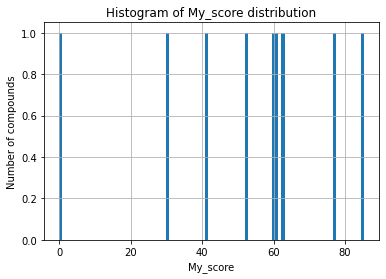

count     9.000000
mean     52.191111
std      25.743252
min       0.000000
25%      40.910000
50%      59.770000
75%      62.690000
max      85.190000
Name: My_score, dtype: float64
Kurtosis:
1.0892
Skewness:
-0.9417


In [37]:
plt.hist(initial_SMILES_to_get_new_molecules['My_score'],bins=100)
plt.xlabel('My_score')
plt.ylabel('Number of compounds')
plt.title('Histogram of My_score distribution')

plt.grid(True)
plt.show()

print(initial_SMILES_to_get_new_molecules['My_score'].describe())
print('Kurtosis:')
print(round(initial_SMILES_to_get_new_molecules['My_score'].kurtosis(),4))
print('Skewness:')
print(round(initial_SMILES_to_get_new_molecules['My_score'].skew(),4))

In [38]:
initial_SMILES_to_get_new_molecules.iloc[[0,1]] #first two selected structures

,index,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED,SYBA_score,SMILES_length,QED normalized,SYBA_score normalized,My_score
0,8,CCC(=O)Nc1ccc2nn(-c3ccc(CC)cc3)nc2c1,294.148061,3.33140,1,4,4,59.81,3,0,1,0.802573,140.570223,36,1.000000,0.703727,85.19
1,6,Cc1cccc(C(=O)Nc2cc(-c3ccccc3)no2)c1,278.105528,3.90232,1,3,3,55.13,3,0,1,0.790067,119.444502,35,0.955046,0.593483,77.43


In [39]:
as_initializers = initial_SMILES_to_get_new_molecules.iloc[[0,1,4,5,8]]

In [40]:
as_initializers

,index,SMILES,molecular_weight,logp,h_bond_donors,h_bond_acceptors,rotatable_bonds,Polar surface area,aromatics rings,Lipinski alerts - to QED calc,Lipinski Rule of 5,QED,SYBA_score,SMILES_length,QED normalized,SYBA_score normalized,My_score
0,8,CCC(=O)Nc1ccc2nn(-c3ccc(CC)cc3)nc2c1,294.148061,3.33140,1,4,4,59.81,3,0,1,0.802573,140.570223,36,1.000000,0.703727,85.19
1,6,Cc1cccc(C(=O)Nc2cc(-c3ccccc3)no2)c1,278.105528,3.90232,1,3,3,55.13,3,0,1,0.790067,119.444502,35,0.955046,0.593483,77.43
4,2,CC(=O)N1CCN(Cc2ccc(-c3ccc(C(O)(C(F)(F)F)C(F)(F...,460.158547,4.32990,1,3,4,43.78,2,1,1,0.691332,119.775813,60,0.600144,0.595212,59.77
5,3,CC(=O)Nc1ccc2c(c1)CCCN2Cc1ccc(C(O)(C(F)(F)F)C(...,446.142897,4.91000,2,3,4,52.57,2,1,1,0.656690,116.609837,56,0.475623,0.578690,52.72
8,5,O=C(O)C1CCC(c2nn(C(=O)c3c(Cl)cccc3C(F)(F)F)c3c...,482.065648,4.77500,2,5,3,92.42,3,1,1,0.524369,5.717677,61,0.000000,0.000000,0.00


In [41]:
as_initializers.to_excel('Prediction_initializers_ROR_activ.xlsx')